In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import scipy
import re
import json
%matplotlib inline
from dnn_app_utils_v2 import *

In [2]:
import subprocess
import os

## Override the L_layer_model to draw test set cost

In [47]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []      # keep track of cost
    costs_test = []
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        

                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
            AL_test = L_model_forward(x_test,parameters)[0]
            cost_test = compute_cost(AL_test, y_test)
            costs_test.append(cost_test)
#             print(cost_test)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.plot(np.squeeze(costs_test))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Creating training set

In [3]:
font_lst = []
curdir = os.getcwd()
for root, dirs, files in os.walk(curdir + os.path.sep + 'fonts'):
#     print(root, dirs, files, "\n\n")
    for name in files:
        single = os.path.join(root, name)
        font_lst.append(single)

for font_id, font in enumerate(font_lst):
    for ii in range(10):
        outdir = "data" + os.path.sep + str(ii) + '_' + str(font_id) + '.jpg'
        subprocess.call(["convert", "-background", "black", "-fill", "white", 
                         "-font", font, "-pointsize", "30",
                         "label:"+str(ii), outdir])

## Loading trainning set

In [5]:
data_lst = []
curdir = os.getcwd()
for root, dirs, files in os.walk(curdir + os.path.sep + 'data'):
#     print(root, dirs, files, "\n\n")
    for name in files:
        single = os.path.join(root, name)
        data_lst.append(single)

## make a random list to split the train and test set

In [9]:
lst_random = list(range(y_orgin2.shape[1]))
np.random.shuffle(lst_random)

In [10]:
x_train = x_orgin[:,lst_random[:1000]]
x_test = x_orgin[:,lst_random[1001:]]
y_train = y_orgin2[:,lst_random[:1000]]
y_test = y_orgin2[:,lst_random[1001:]]

## Training

Cost after iteration 0: 6.962567
6.91885795958
Cost after iteration 100: 3.225738
3.24337154391
Cost after iteration 200: 2.834993
2.85724052281
Cost after iteration 300: 2.351791
2.37235256734
Cost after iteration 400: 1.936010
1.95045816945
Cost after iteration 500: 1.631807
1.64082145029
Cost after iteration 600: 1.381892
1.38929045162
Cost after iteration 700: 1.176910
1.1829728869
Cost after iteration 800: 1.009639
1.01316821778
Cost after iteration 900: 0.872304
0.873441110106
Cost after iteration 1000: 0.757660
0.752236282821
Cost after iteration 1100: 0.668200
0.660179430968
Cost after iteration 1200: 0.596525
0.587186869669
Cost after iteration 1300: 0.538388
0.529126003362
Cost after iteration 1400: 0.490168
0.482137999814
Cost after iteration 1500: 0.449746
0.443847411002
Cost after iteration 1600: 0.415305
0.41198788851
Cost after iteration 1700: 0.385790
0.385658679521
Cost after iteration 1800: 0.360163
0.36324370068
Cost after iteration 1900: 0.337672
0.343919429404
Cost

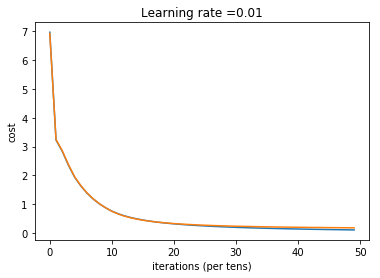

In [54]:
para = L_layer_model(x_train, y_train, [600,100,20,10], learning_rate = 0.01, num_iterations = 5000, print_cost=True)

## test set accuracy

In [59]:
s = 0
for k,v in enumerate(y_orgin[0,lst_random[1001:]]):
    if AL.argmax(0)[k] == v:
        s += 1
print (s/len(AL.argmax(0)*100))

0.9781659388646288


## Saving the parameter to numRegPara2.json

In [124]:
pare_lst = dict()
for key, val in para.items():
    pare_lst[key] = val.tolist()

with open("numRegPara2.json", "w") as f:
    json.dump(pare_lst,f)